In [2]:
import torch as torch

In [3]:
import yfinance as yf

In [4]:
device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')

In [5]:
ticker='AAPL'
df=yf.download(ticker, '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
df["item_id"] = "AAPL"


In [7]:
chronos_df = df[["Close"]]
chronos_df = df[["Close"]].copy()
chronos_df["item_id"] = "AAPL"
chronos_df = chronos_df.reset_index()   # Date becomes column again
chronos_df = chronos_df[["item_id", "Date", "Close"]]


In [8]:
chronos_df

Price,item_id,Date,Close
Ticker,,,AAPL
0,AAPL,2020-01-02,72.468277
1,AAPL,2020-01-03,71.763718
2,AAPL,2020-01-06,72.335548
3,AAPL,2020-01-07,71.995361
4,AAPL,2020-01-08,73.153503
...,...,...,...
1520,AAPL,2026-01-21,247.649994
1521,AAPL,2026-01-22,248.350006
1522,AAPL,2026-01-23,248.039993


In [9]:
df_context=chronos_df[:-7]

In [10]:
df_context

Price,item_id,Date,Close
Ticker,,,AAPL
0,AAPL,2020-01-02,72.468277
1,AAPL,2020-01-03,71.763718
2,AAPL,2020-01-06,72.335548
3,AAPL,2020-01-07,71.995361
4,AAPL,2020-01-08,73.153503
...,...,...,...
1513,AAPL,2026-01-09,259.369995
1514,AAPL,2026-01-12,260.250000
1515,AAPL,2026-01-13,261.049988


In [11]:
df_test=chronos_df[-7:]

In [12]:
df_test

Price,item_id,Date,Close
Ticker,,,AAPL
1518,AAPL,2026-01-16,255.529999
1519,AAPL,2026-01-20,246.699997
1520,AAPL,2026-01-21,247.649994
1521,AAPL,2026-01-22,248.350006
1522,AAPL,2026-01-23,248.039993
1523,AAPL,2026-01-26,255.410004
1524,AAPL,2026-01-27,258.269989


In [13]:
pip install chronos-forecasting


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd  # requires: pip install 'pandas[pyarrow]'
from chronos import Chronos2Pipeline

pipeline = Chronos2Pipeline.from_pretrained("amazon/chronos-2", device_map="cuda")

In [15]:
future_df = df_test.drop(columns="Close")

C:\Users\goyal\AppData\Local\Temp\ipykernel_25368\3910434314.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  future_df = df_test.drop(columns="Close")


In [16]:
future_df

Price,item_id,Date
Ticker,,
1518,AAPL,2026-01-16
1519,AAPL,2026-01-20
1520,AAPL,2026-01-21
1521,AAPL,2026-01-22
1522,AAPL,2026-01-23
1523,AAPL,2026-01-26
1524,AAPL,2026-01-27


In [17]:
df_context["Date"] = pd.to_datetime(df_context["Date"])
df_context = df_context.sort_values("Date")


C:\Users\goyal\AppData\Local\Temp\ipykernel_25368\2181771933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_context["Date"] = pd.to_datetime(df_context["Date"])


In [18]:
df_context = df_context.set_index("Date")
df_context = df_context.asfreq("B")
df_context = df_context.reset_index()


In [19]:
last_date = df_context["Date"].max()

future_dates = pd.date_range(
    start=last_date,
    periods=7 + 1,   # +1 because last date is included
    freq="B"
)[1:]

future_df = pd.DataFrame({
    "Date": future_dates,
    "item_id": "AAPL"
})


In [20]:
print(df_context.dtypes)
print(df_context.head())


Price    Ticker
Date               datetime64[ns]
item_id                    object
Close    AAPL             float64
dtype: object
Price        Date item_id      Close
Ticker                          AAPL
0      2020-01-02    AAPL  72.468277
1      2020-01-03    AAPL  71.763718
2      2020-01-06    AAPL  72.335548
3      2020-01-07    AAPL  71.995361
4      2020-01-08    AAPL  73.153503


In [21]:
df_context.columns = df_context.columns.get_level_values(0)

In [22]:
print(df_context.columns)



Index(['Date', 'item_id', 'Close'], dtype='object', name='Price')


In [23]:
df_context["Date"] = pd.to_datetime(df_context["Date"])
df_context = df_context.sort_values("Date")

df_context = df_context.set_index("Date")
df_context = df_context.asfreq("B")  # business days
df_context = df_context.reset_index()


In [24]:
print(df_context.dtypes)
print(df_context.head())


Price
Date       datetime64[ns]
item_id            object
Close             float64
dtype: object
Price       Date item_id      Close
0     2020-01-02    AAPL  72.468277
1     2020-01-03    AAPL  71.763718
2     2020-01-06    AAPL  72.335548
3     2020-01-07    AAPL  71.995361
4     2020-01-08    AAPL  73.153503


In [25]:
last_date = df_context["Date"].max()

future_df = pd.DataFrame({
    "Date": pd.date_range(
        start=last_date,
        periods=7 + 1,
        freq="B"
    )[1:],
    "item_id": "AAPL"
})


In [26]:
df_context = df_context.copy()

df_context["Date"] = pd.to_datetime(df_context["Date"])
df_context = df_context.sort_values("Date")

df_context = (
    df_context
    .set_index("Date")
    .asfreq("B")
    .dropna()          # 🔥 THIS IS THE MISSING PIECE
    .reset_index()
)


In [27]:
# 1. No NaNs
print(df_context.isna().sum())

# 2. Strictly increasing dates
print(df_context["Date"].is_monotonic_increasing)

# 3. One series only
print(df_context["item_id"].unique())


Price
Date       0
item_id    0
Close      0
dtype: int64
True
['AAPL']


In [28]:
last_date = df_context["Date"].max()

future_df = pd.DataFrame({
    "Date": pd.date_range(
        start=last_date,
        periods=7 + 1,
        freq="B"
    )[1:],
    "item_id": "AAPL"
})


In [29]:
df_context = (
    df_context
    .assign(Date=lambda x: pd.to_datetime(x["Date"]))
    .sort_values("Date")
    .set_index("Date")
    .asfreq("B")
    .dropna()
    .reset_index()
)


In [30]:
df_context = df_context.copy()

df_context = df_context.sort_values("Date").reset_index(drop=True)

df_context["t"] = range(len(df_context))

df_context = df_context[["t", "item_id", "Close"]]


In [31]:
prediction_length = 7

future_df = pd.DataFrame({
    "t": range(len(df_context), len(df_context) + prediction_length),
    "item_id": "AAPL"
})


In [32]:
pred_df = pipeline.predict_df(
    df=df_context,
    future_df=future_df,
    prediction_length=7,
    quantile_levels=[0.1, 0.5, 0.9],
    id_column="item_id",
    timestamp_column="t",
    target="Close",
)


In [33]:
pred_df

,item_id,t,target_name,predictions,0.1,0.5,0.9
0,AAPL,1970-01-01 00:00:00.000001518,Close,258.059265,253.737717,258.059265,261.794250
1,AAPL,1970-01-01 00:00:00.000001519,Close,258.122894,252.834045,258.122894,262.894623
2,AAPL,1970-01-01 00:00:00.000001520,Close,258.026672,251.221619,258.026672,263.632874
3,AAPL,1970-01-01 00:00:00.000001521,Close,257.692719,250.668823,257.692719,264.260254
4,AAPL,1970-01-01 00:00:00.000001522,Close,258.071960,249.800964,258.071960,265.529480
5,AAPL,1970-01-01 00:00:00.000001523,Close,257.668549,248.883392,257.668549,266.272888
6,AAPL,1970-01-01 00:00:00.000001524,Close,258.049988,248.827194,258.049988,266.940002


In [34]:
pred_df = pred_df.copy()

last_t = df_context["t"].iloc[-1]

pred_df["t_plot"] = range(
    last_t + 1,
    last_t + 1 + len(pred_df)
)


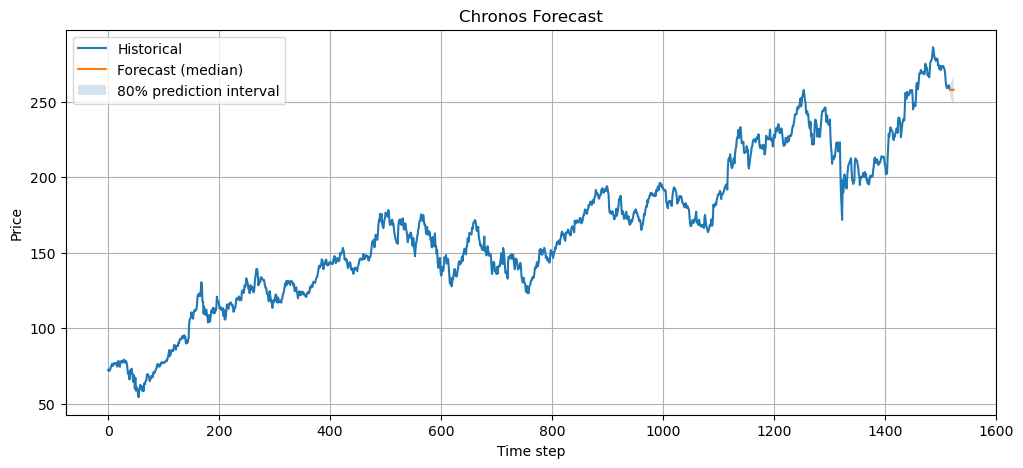

In [35]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Prepare prediction x-axis
# -----------------------------
pred_df = pred_df.copy()

last_t = df_context["t"].iloc[-1]

pred_df["t_plot"] = range(
    last_t + 1,
    last_t + 1 + len(pred_df)
)

# -----------------------------
# 2. Plot historical + forecast
# -----------------------------
plt.figure(figsize=(12, 5))

# Historical data
plt.plot(
    df_context["t"],
    df_context["Close"],
    label="Historical",
)

# Median forecast (0.5 quantile)
plt.plot(
    pred_df["t_plot"],
    pred_df["0.5"],     # ⚠ string, not float
    label="Forecast (median)",
)

# Prediction interval (0.1–0.9)
plt.fill_between(
    pred_df["t_plot"],
    pred_df["0.1"],     # ⚠ string
    pred_df["0.9"],     # ⚠ string
    alpha=0.2,
    label="80% prediction interval",
)

# -----------------------------
# 3. Styling
# -----------------------------
plt.xlabel("Time step")
plt.ylabel("Price")
plt.title("Chronos Forecast")
plt.legend()
plt.grid(True)
plt.show()


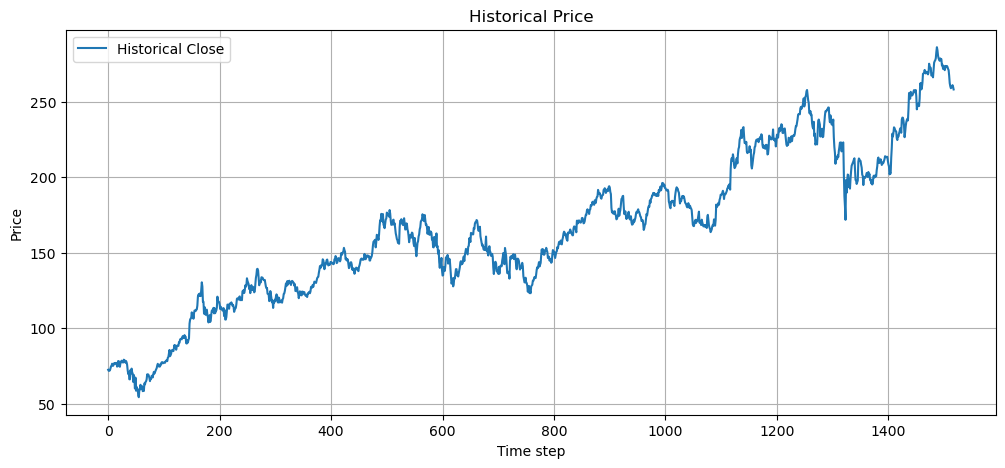

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_context["t"], df_context["Close"], label="Historical Close")

plt.xlabel("Time step")
plt.ylabel("Price")
plt.title("Historical Price")
plt.legend()
plt.grid(True)

plt.show()


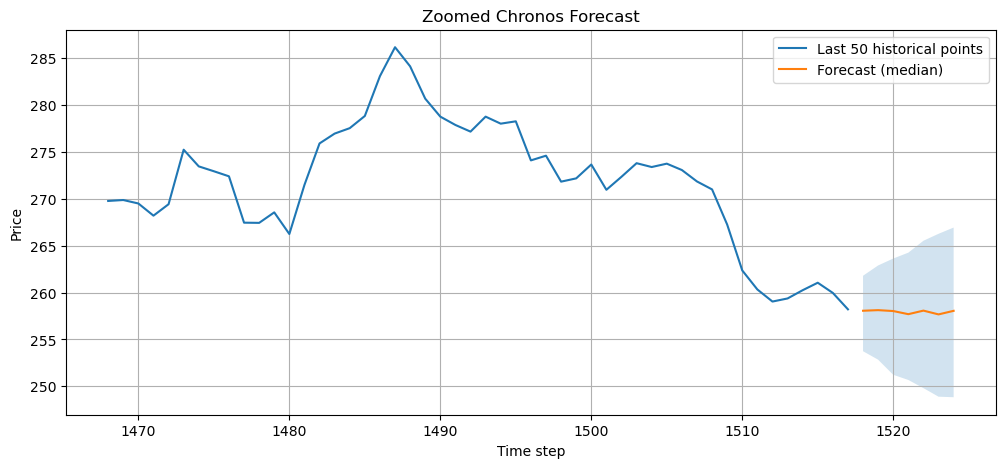

In [37]:
plt.figure(figsize=(12, 5))

plt.plot(
    df_context["t"].iloc[-50:],
    df_context["Close"].iloc[-50:],
    label="Last 50 historical points",
)

plt.plot(
    pred_df["t_plot"],
    pred_df["0.5"],
    label="Forecast (median)",
)

plt.fill_between(
    pred_df["t_plot"],
    pred_df["0.1"],
    pred_df["0.9"],
    alpha=0.2,
)

plt.xlabel("Time step")
plt.ylabel("Price")
plt.title("Zoomed Chronos Forecast")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Copy to avoid side effects
pred_df = pred_df.copy()
df_test = df_test.copy()

# Last timestep from training
last_t = df_context["t"].iloc[-1]

# Create common x-axis
pred_df["t_plot"] = range(last_t + 1, last_t + 1 + len(pred_df))
df_test["t_plot"] = range(last_t + 1, last_t + 1 + len(df_test))


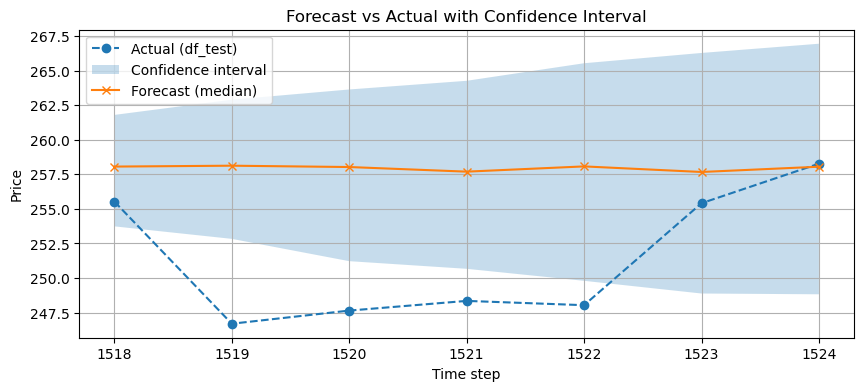

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Actual values
plt.plot(
    df_test["t_plot"],
    df_test["Close"],
    marker="o",
    linestyle="--",
    label="Actual (df_test)"
)

# Confidence interval
plt.fill_between(
    pred_df["t_plot"],
    pred_df["0.1"],   # lower quantile
    pred_df["0.9"],   # upper quantile
    alpha=0.25,
    label="Confidence interval"
)

# Median forecast
plt.plot(
    pred_df["t_plot"],
    pred_df["0.5"],
    marker="x",
    label="Forecast (median)"
)

plt.xlabel("Time step")
plt.ylabel("Price")
plt.title("Forecast vs Actual with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
import numpy as np

# Actual values
y_true = df_test["Close"].values

# Predicted median (0.5 quantile)
y_pred = pred_df["0.5"].values   # ⚠ string column name

# Root Mean Square Error
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))

print(f"RMSE: {rmse:.4f}")


RMSE: 7.8939
